# **Data preparation**

In [1]:
DATA_SOURCE = "../../01_data/adult_reconstruction.csv"
FILE_TO_SAVE = "../../01_data/prepared_data.csv"

In [2]:
import pandas as pd
import numpy as np

import preprocessing_utils

2022-11-18 15:13:53.311533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:13:53.430693: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-18 15:13:53.434497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 15:13:53.434507: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
census_data = pd.read_csv(DATA_SOURCE)

## Overview

In [4]:
census_data.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


<AxesSubplot:>

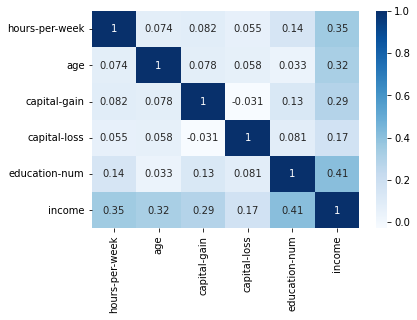

In [5]:
import seaborn as sb
corr = census_data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

## Dropping (label) outliers

We will drop those records, which are considered to be outliers (i.e. income>95%)

Text(0.5, 1.0, 'Histogram of incomes\n(with outliers)')

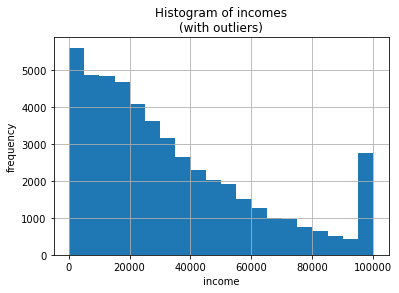

In [6]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(with outliers)")

In [7]:
census_data = census_data[census_data["income"] <= census_data["income"].quantile(.95)]

Text(0.5, 1.0, 'Histogram of incomes\n(withot outliers)')

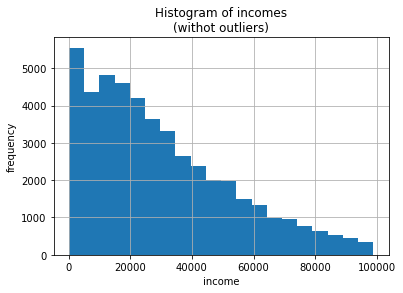

In [8]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(withot outliers)")

In [9]:
census_data = census_data[census_data["workclass"] != "?"]

## Partitioning data

In [10]:
categorical = ["workclass",
               "marital-status",
               "relationship",
               "race",
               "gender",
               "native-country",
               "occupation"]
numeric = ["hours-per-week", "age", "capital-gain", "capital-loss", "education-num"]

In [11]:
under_educated = census_data[census_data["education-num"] < 10]
well_educated = census_data[census_data["education-num"] >= 13]
college_educated = census_data[np.logical_and(census_data["education-num"]>=10,
                                              census_data["education-num"]<13)]

partitioned_dataset = [under_educated, college_educated, well_educated]

In [12]:
partitioned_x = []
partitioned_y = []

for dataset in partitioned_dataset:
    x = dataset.drop(columns=["education", "income"])
    partitioned_x.append(preprocessing_utils.categorical_encoding_and_scaling(x, categorical, numeric))
    #partitioned_y.append(preprocessing_utils.normalize_series(dataset["income"]).reshape([len(x), 1]))
    partitioned_y.append(np.array(dataset["income"]/max(census_data["income"])).reshape([len(x), 1]))

2022-11-18 15:13:55.795157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train/Test splitting

In [13]:
TEST_PORTION = .1
TRAIN_PATH = "../../01_data/train/"
TEST_PATH = "../../01_data/test/"

In [14]:
uned_limit = int(TEST_PORTION*len(partitioned_x[0]))
np.savetxt(TEST_PATH+"under_educated_features.csv", partitioned_x[0][:uned_limit] , delimiter=",")
np.savetxt(TRAIN_PATH+"under_educated_features.csv", partitioned_x[0][uned_limit:], delimiter=",")
np.savetxt(TEST_PATH+"under_educated_labels.csv", partitioned_y[0][:uned_limit]   , delimiter=",")
np.savetxt(TRAIN_PATH+"under_educated_labels.csv", partitioned_y[0][uned_limit:]  , delimiter=",")

well_limit = int(TEST_PORTION*len(partitioned_x[1]))
np.savetxt(TEST_PATH+"well_educated_features.csv", partitioned_x[1][:well_limit]  , delimiter=",")
np.savetxt(TRAIN_PATH+"well_educated_features.csv", partitioned_x[1][well_limit:] , delimiter=",")
np.savetxt(TEST_PATH+"well_educated_labels.csv", partitioned_y[1][:well_limit]    , delimiter=",")
np.savetxt(TRAIN_PATH+"well_educated_labels.csv", partitioned_y[1][well_limit:]   , delimiter=",")

col_limit = int(TEST_PORTION*len(partitioned_x[2]))
np.savetxt(TEST_PATH+"college_educated_features.csv", partitioned_x[2][:col_limit] , delimiter=",")
np.savetxt(TRAIN_PATH+"college_educated_features.csv", partitioned_x[2][col_limit:], delimiter=",")
np.savetxt(TEST_PATH+"college_educated_labels.csv", partitioned_y[2][:col_limit]   , delimiter=",")
np.savetxt(TRAIN_PATH+"college_educated_labels.csv", partitioned_y[2][col_limit:]  , delimiter=",")